# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df = pd.read_csv('data/M1_final.csv')
df_0 = df.copy()

# Clean Dataset

## Drop NaN

In [4]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(28820, 23)
(28818, 23)


## Dtypes

In [5]:
df['Dew Point'] = df['Dew Point'].apply(lambda r : r.split()[0])
df['Dew Point'] = pd.to_numeric(df['Dew Point'])

## Numerical cols

In [6]:
df_num = df.loc[:, df.dtypes != np.object]
df_num.shape

(28818, 18)

## Categorical cols

In [7]:
df_cat = df.loc[:, df.dtypes == np.object]
df_cat.shape

(28818, 5)

# TAXI_OUT

In [19]:
X = df.drop('TAXI_OUT', axis=1)
X_num = df.drop('TAXI_OUT', axis=1)
y = df['TAXI_OUT']
z = df_num['TAXI_OUT']

## plot scatter

In [9]:
df_num.head(2)

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  \
0     11             1            5         -1               124       636   
1     11             1            5         -7               371      2475   

   CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature  Dew Point  Humidity  \
0        324         323        448           48         34        58   
1        340         333        531           48         34        58   

   Wind Speed  Wind Gust  Pressure  sch_dep  sch_arr  TAXI_OUT  
0          25         38     29.86        9       17        14  
1          25         38     29.86        9       17        15

In [10]:
phy_cols = ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']

In [11]:
time_cols = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY']

In [12]:
other_cols = ['DEP_DELAY', 'CRS_ELAPSED_TIME', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'sch_dep', 'sch_arr']

In [13]:
def plot_scatter(df, cols, z):
    n = 1
    n_length = len(cols)
    plt.figure(figsize=(30,30))
    for i,x_lbl in enumerate(cols):
        for j,y_lbl in enumerate(cols):
            x = df[x_lbl]
            y = df[y_lbl]
            plt.subplot(n_length,n_length,n)

            plt.scatter(x,y, c=z)
            plt.xlabel(x_lbl)
            plt.ylabel(y_lbl)
            n+=1

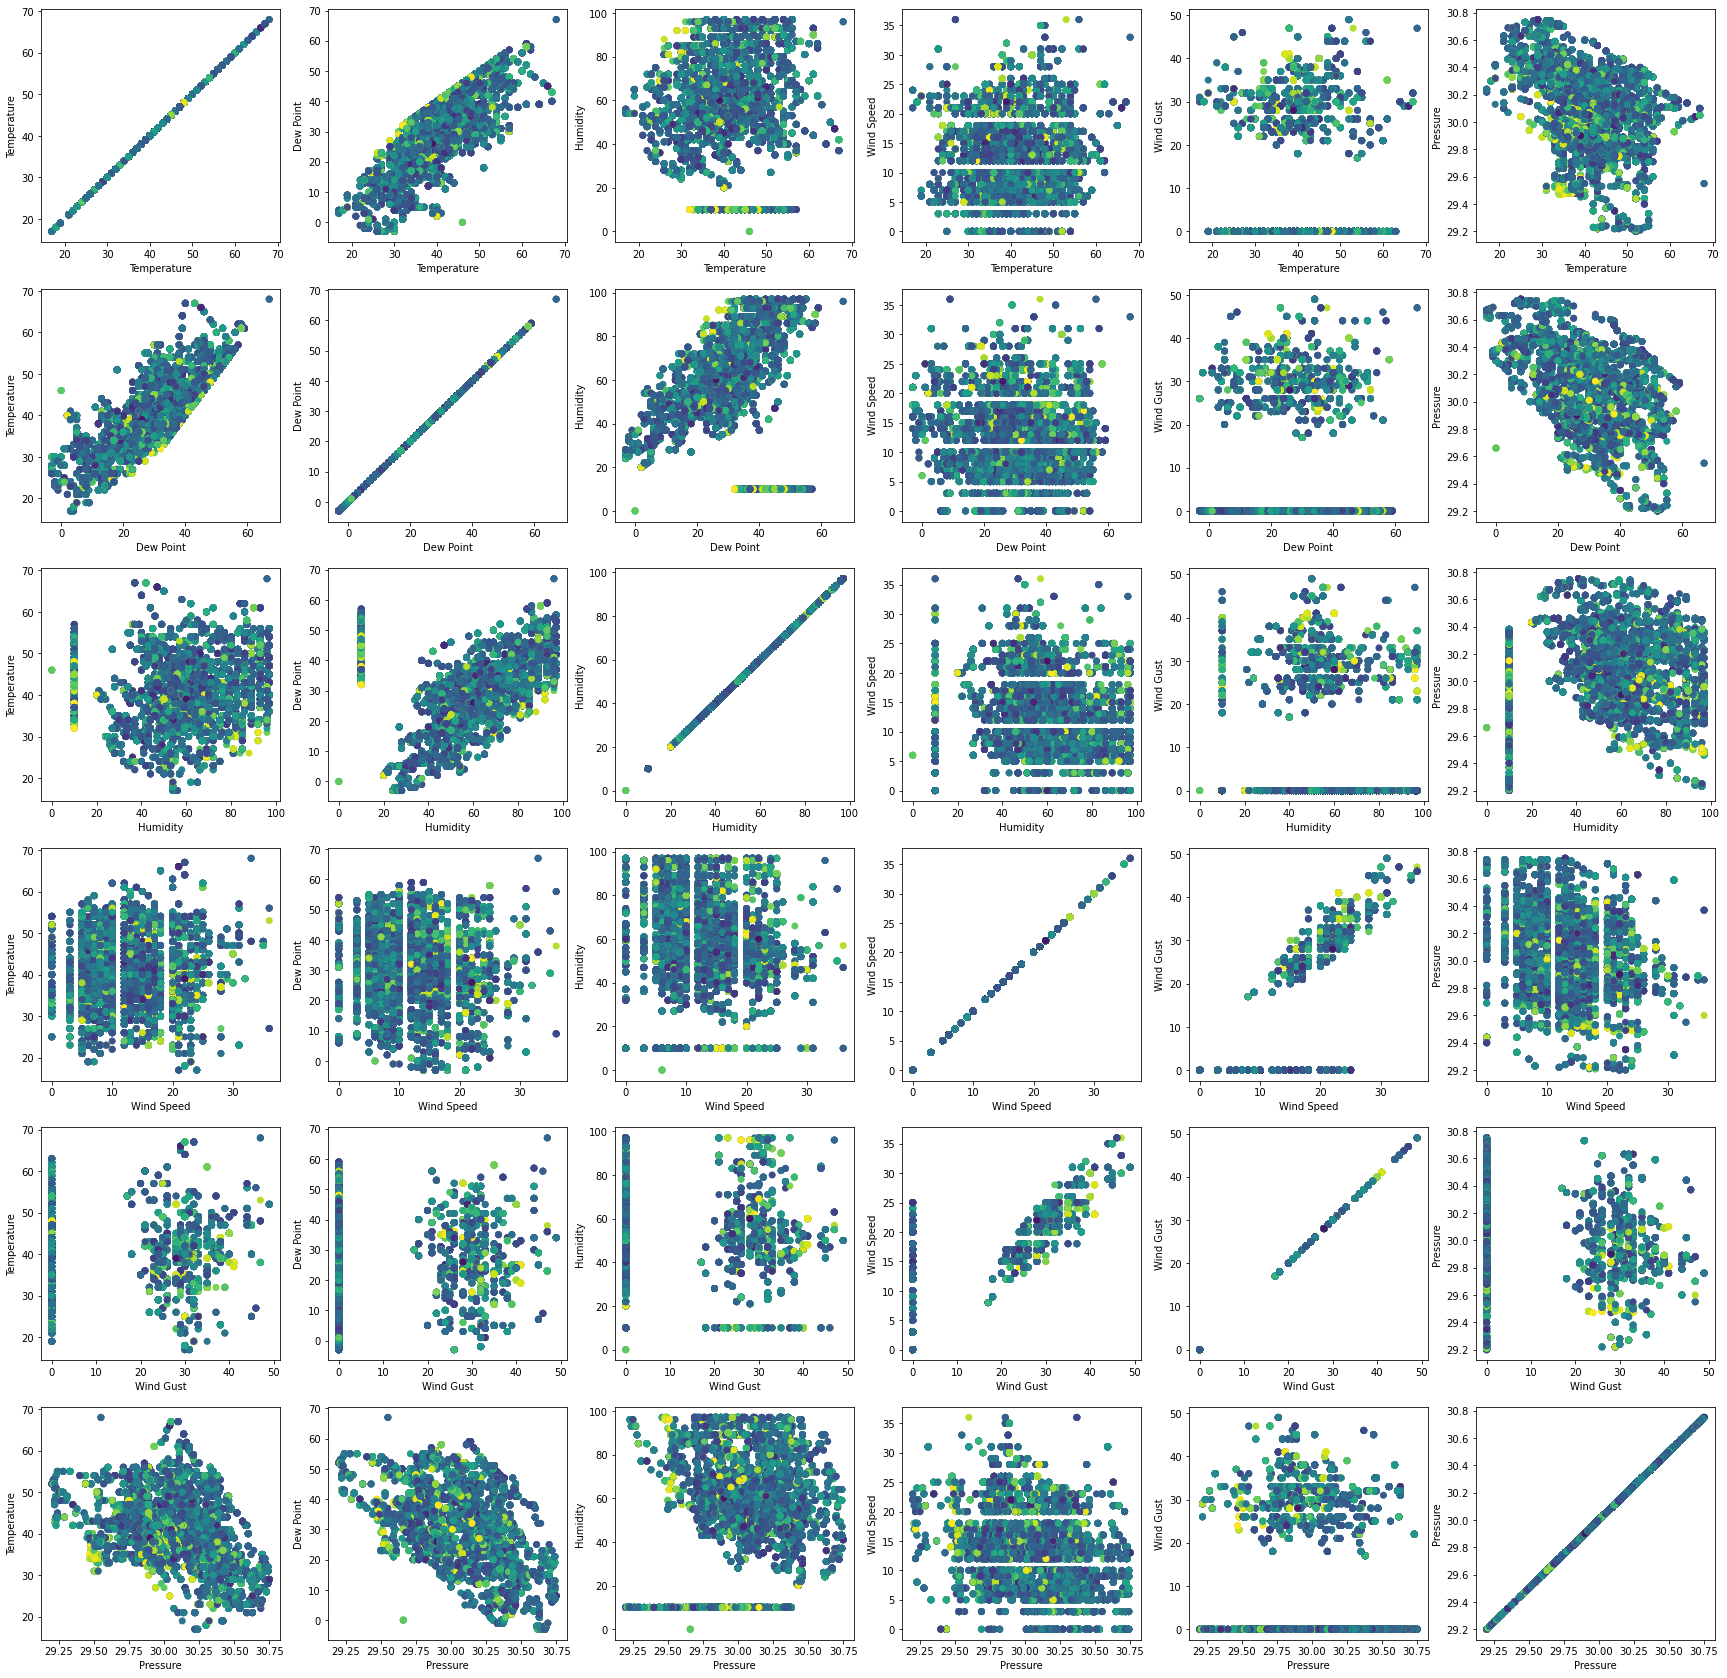

In [14]:
plot_scatter(df_num, phy_cols, z)

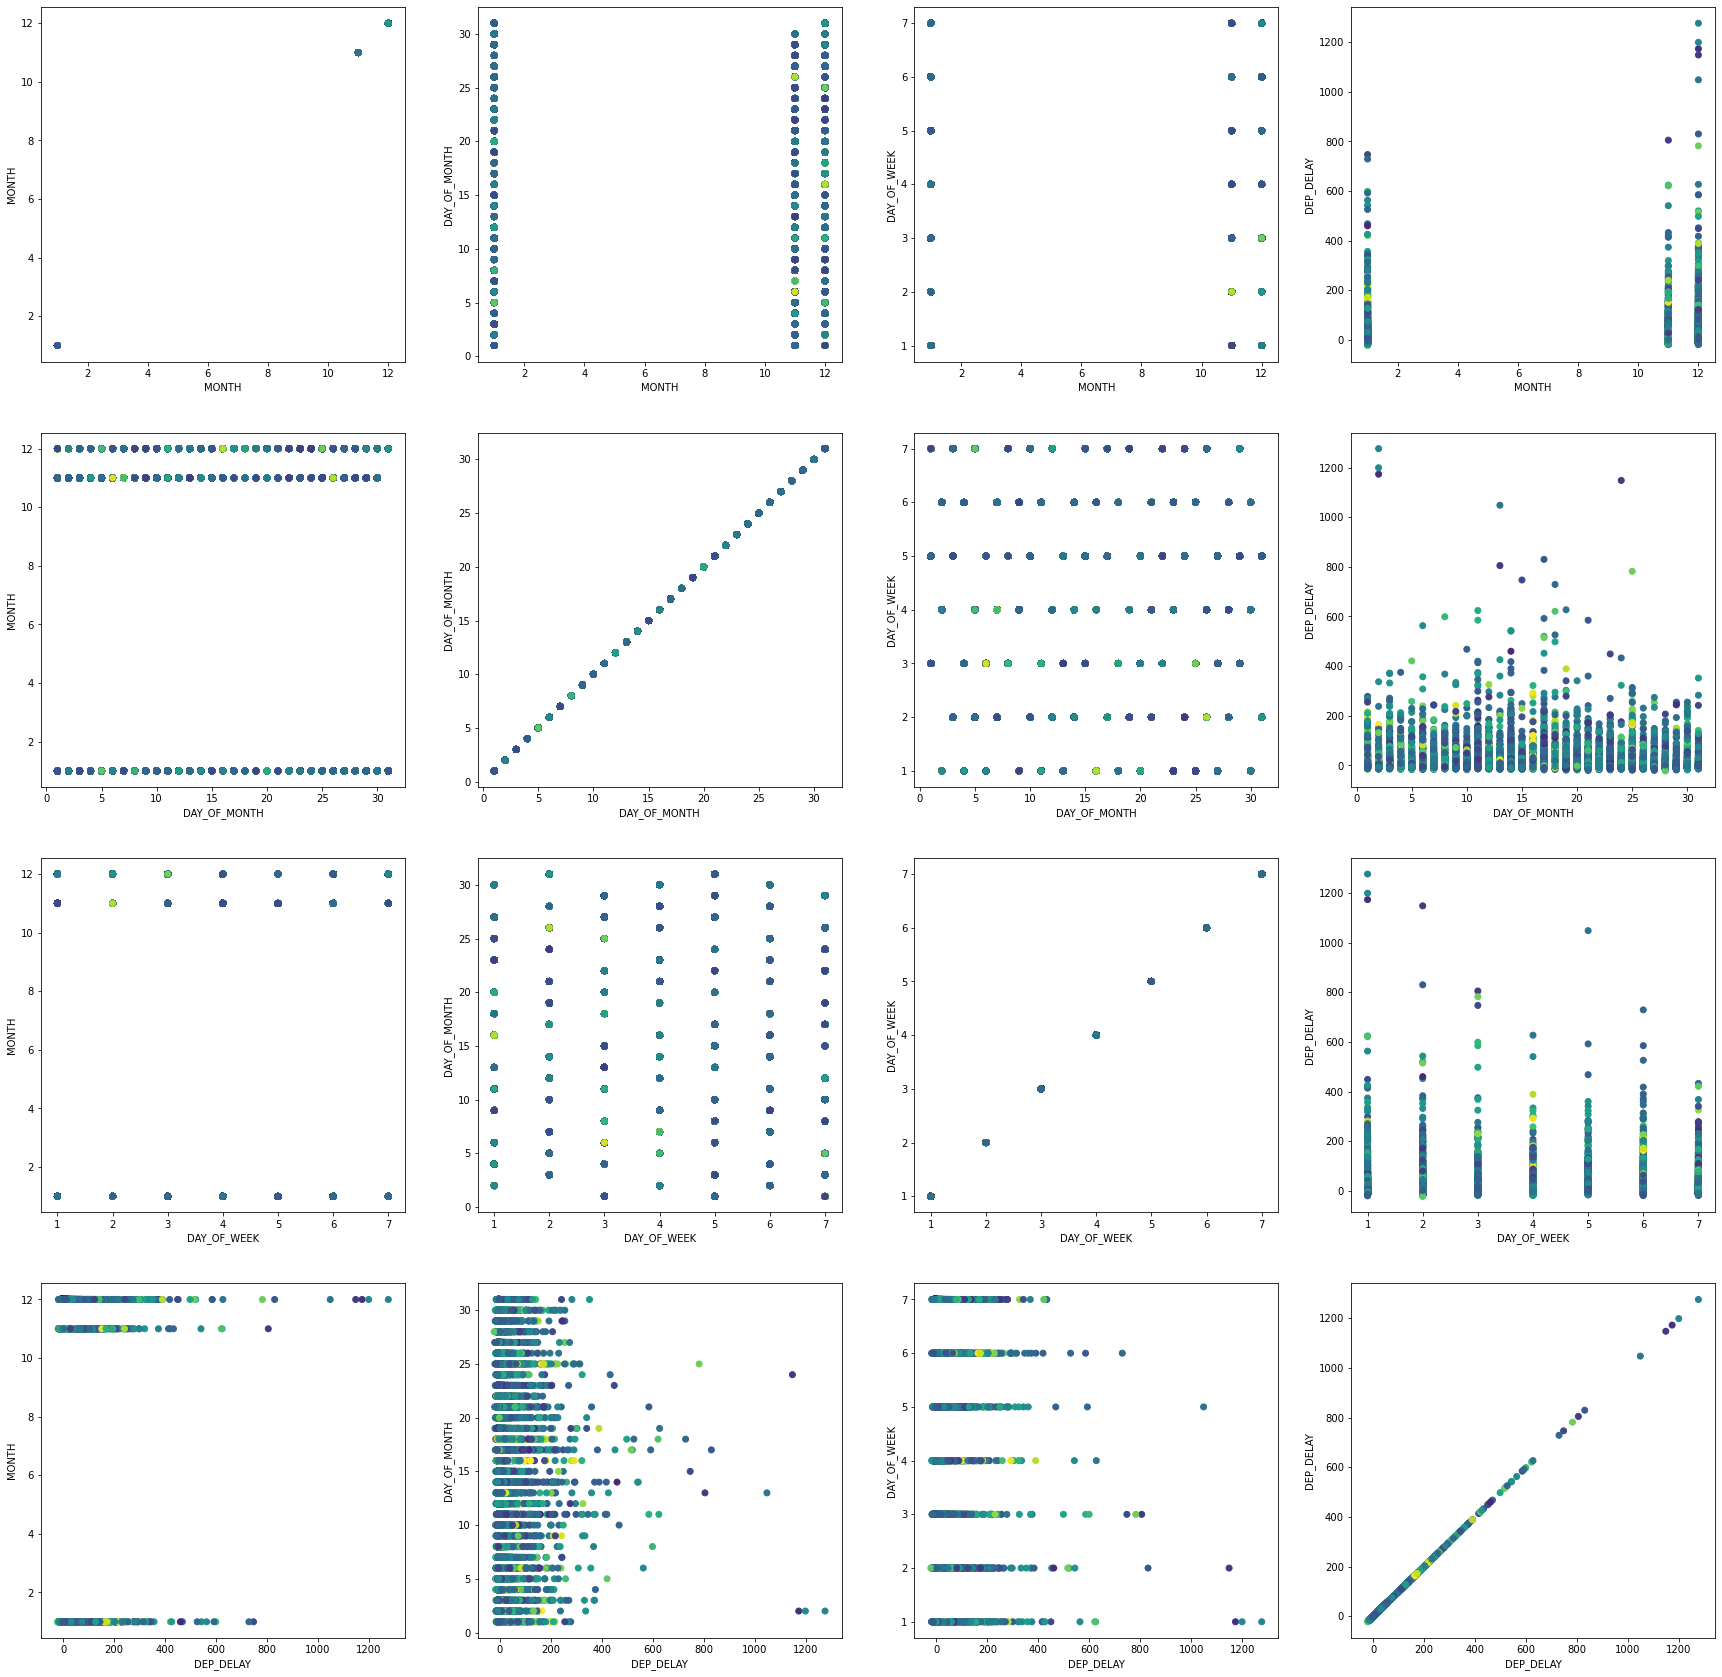

In [15]:
plot_scatter(df_num, time_cols, z)

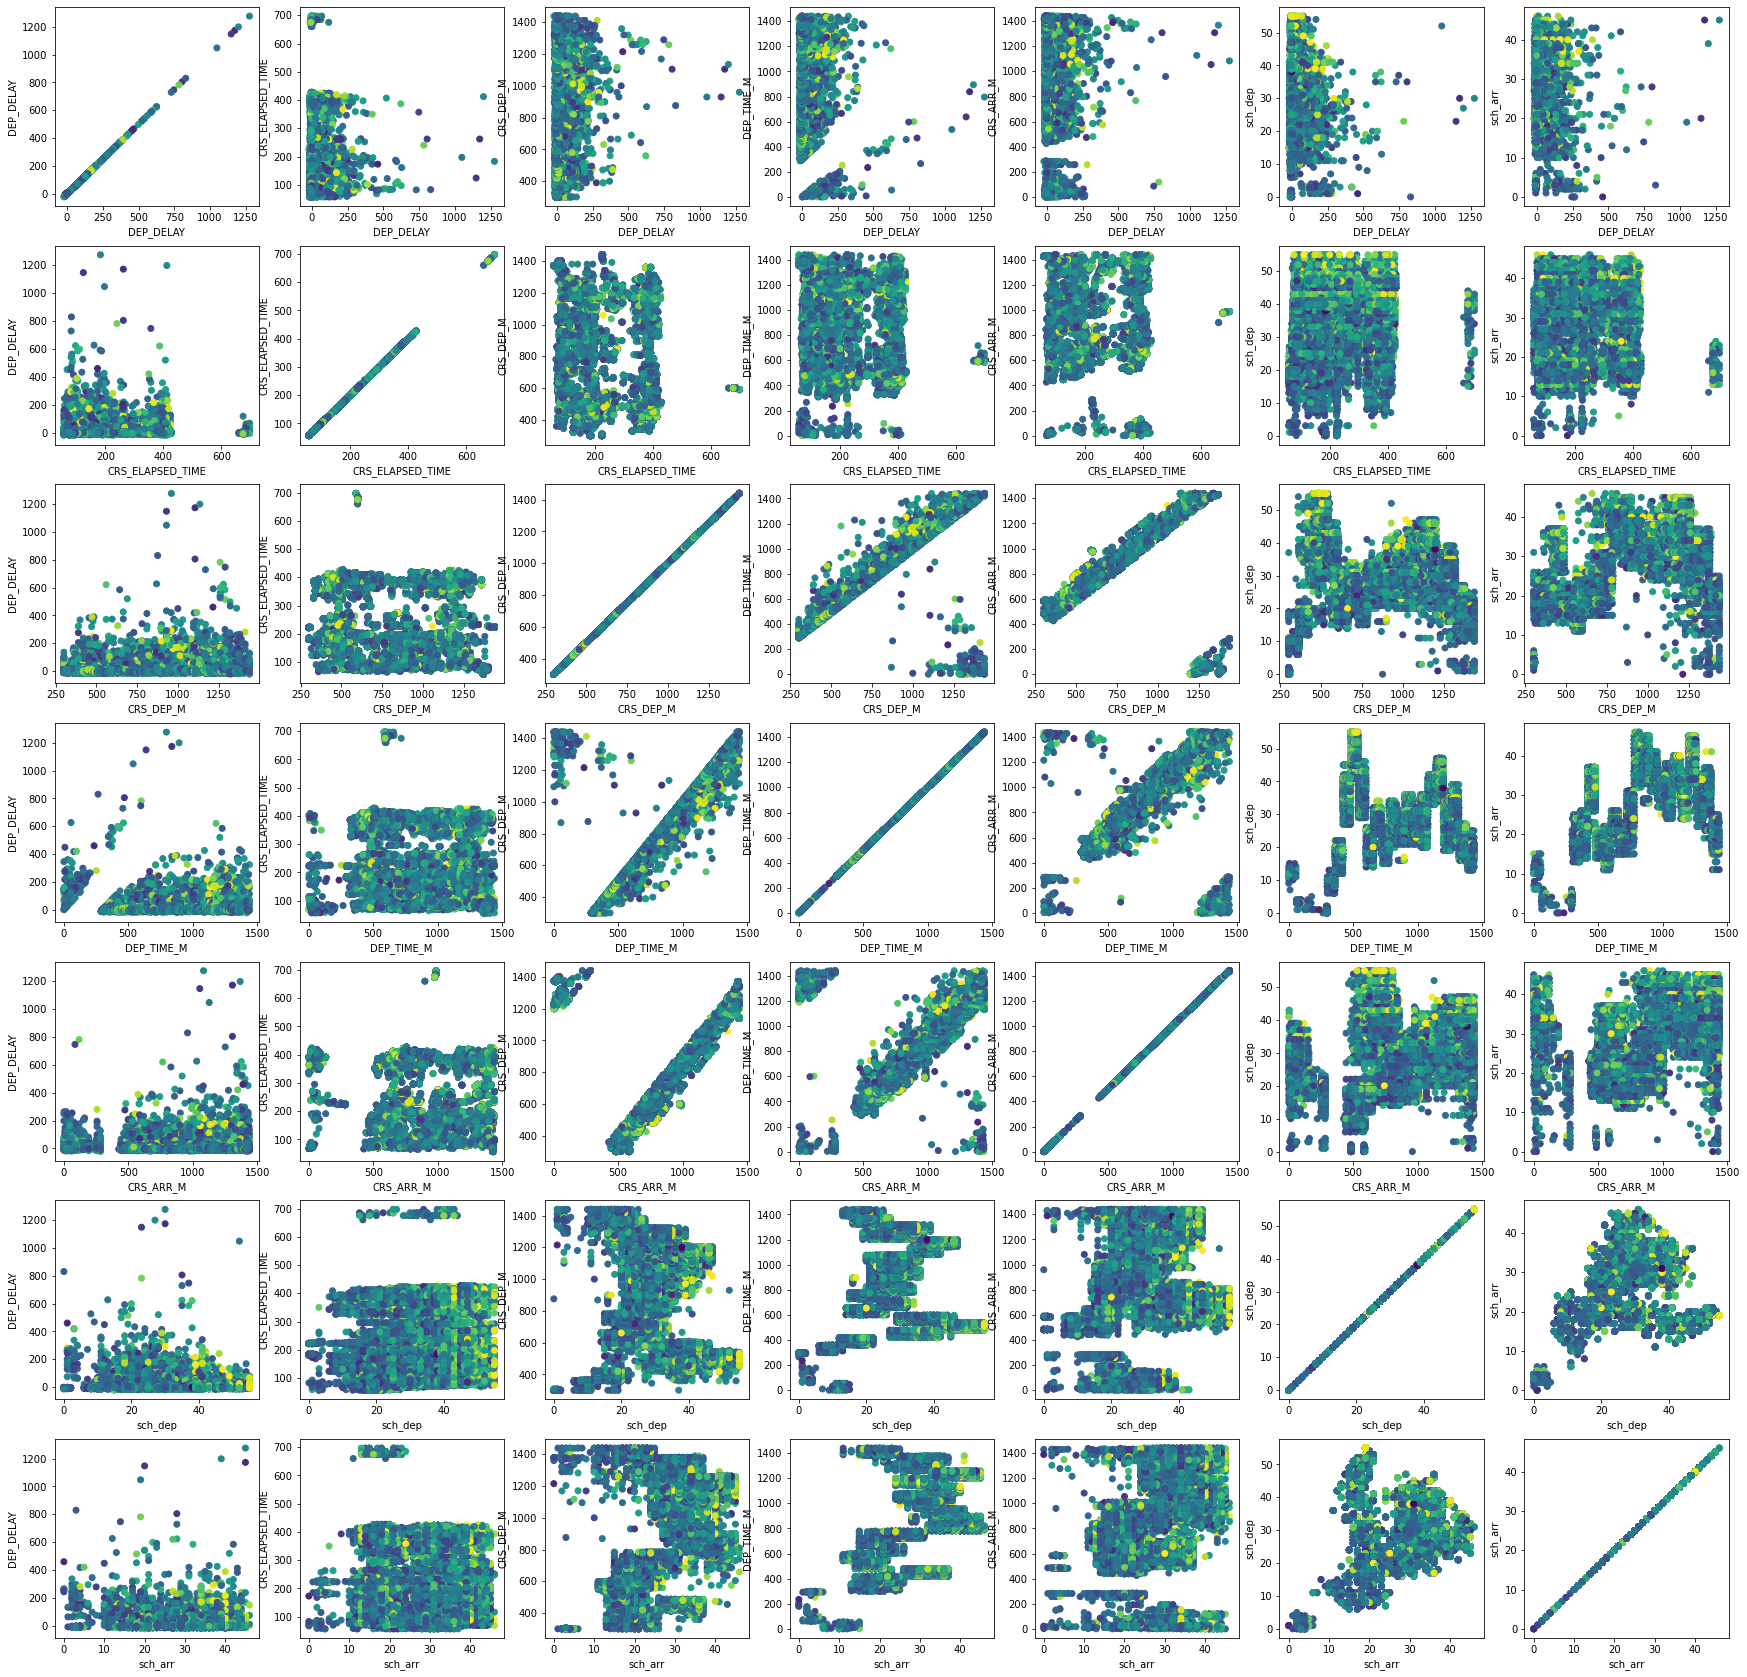

In [16]:
plot_scatter(df_num, other_cols, z)

## New Features 

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def model_run_cv(cols, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X_train[cols])
    y_scale = scaler.fit_transform(np.array(y_train).reshape(-1,1))
    
    estimator = DecisionTreeRegressor()    
    scr = cross_val_score(estimator, X_scale, y_scale, cv=5).mean()
    print('score = {:.0%}'.format(scr))
    
    y_pred = cross_val_predict(estimator, X_scale, y_scale, cv=5)
    plt.scatter(y_scale, y_pred)
    plt.show();

In [20]:
X_num.head(3)

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  \
0         -1               124       636        324         323        448   
1         -7               371      2475        340         333        531   
2         40               181      1069        301         341        482   

   Temperature  Dew Point  Humidity Wind  Wind Speed  Wind Gust  Pressure  \
0           48         34        58    W          25         38     29.86   
1           48         34        58    W          25         38     29.86   
2           48         34        58    W          25         38     29.86   

      Condition  sch_dep  sch_arr  
0  Fair / Windy        9       17  
1  Fair / Windy        9       17  
2  Fair / Windy        9       17

In [23]:
# handle infinite situation

In [21]:
X_num['dew_temp'] = X_num['Dew Point'] / X_num['Temperature']
#X_num['wind_wind'] = X_num['Wind Speed'] / X_num['Wind Gust']

score = 18%


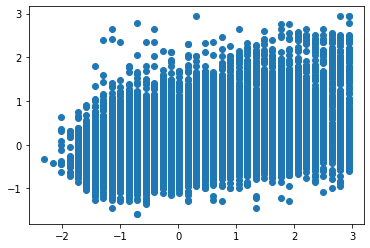

In [22]:
cols = ['Wind Speed', 'Wind Gust', 'Pressure']
model_run_cv(cols, X_num, y)